Mean Squared Error: 45250428959.74516
Root Mean Squared Error: 212721.48213037904
Mean Absolute Error: 127620.01890040858
R-squared: 0.7006785748663293


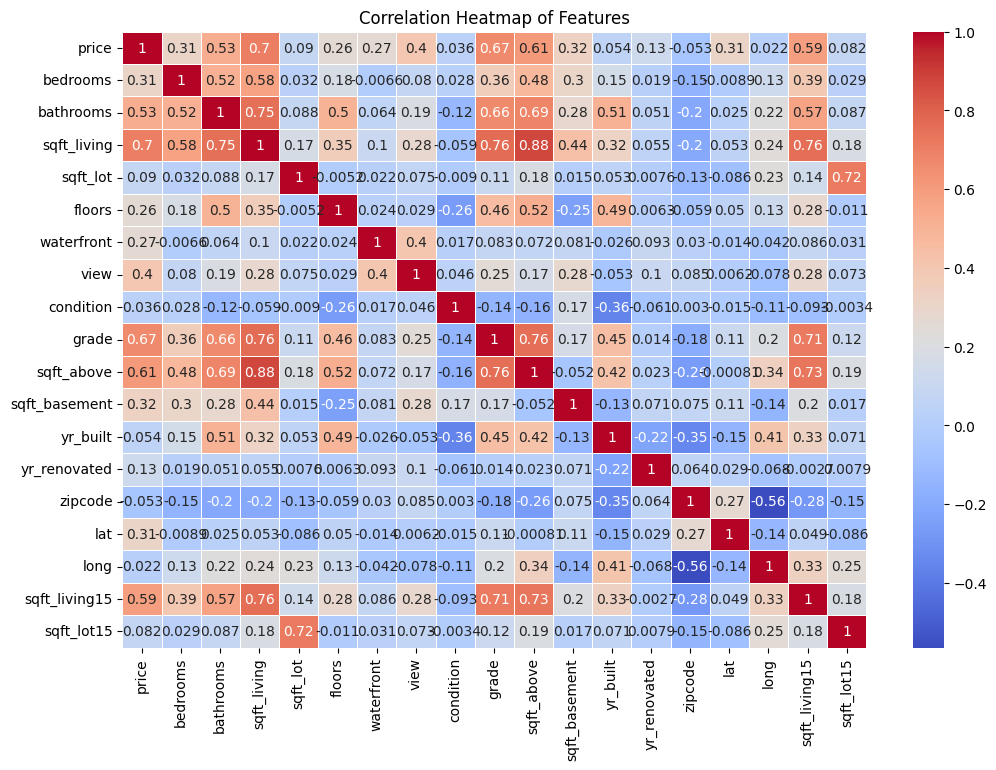

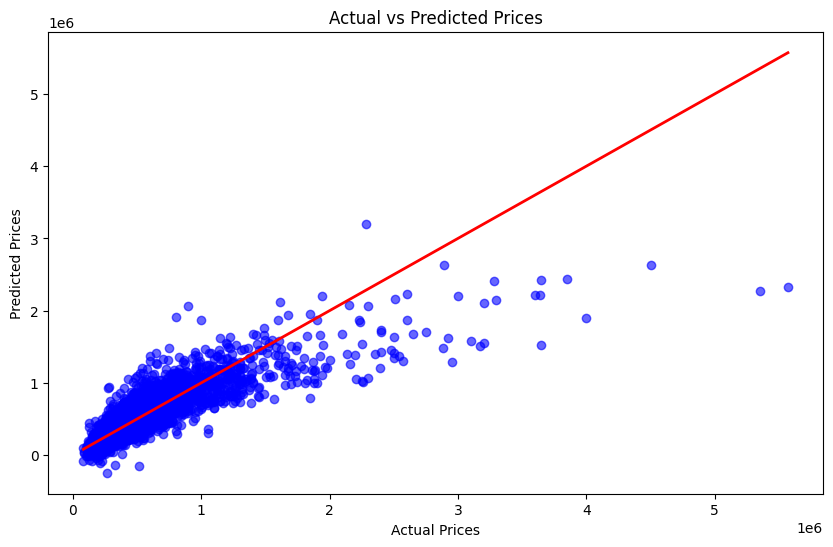

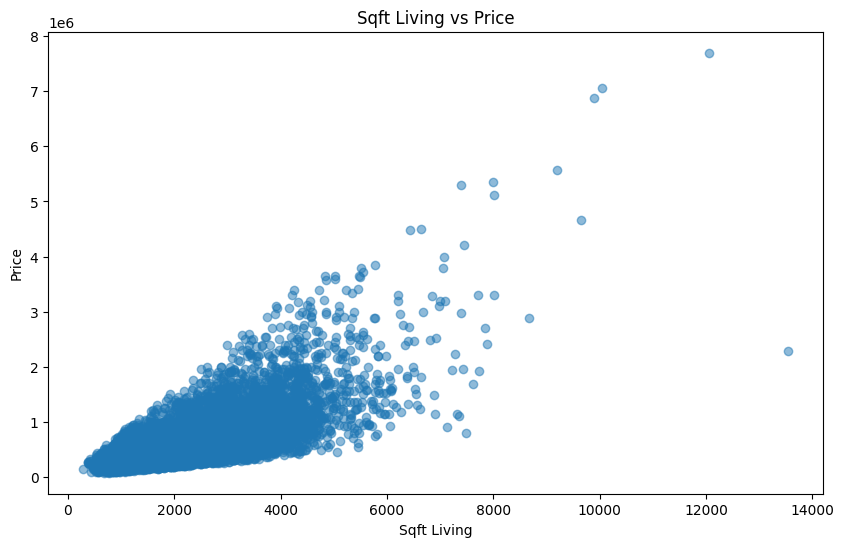

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer

# Load the dataset
kc_data = pd.read_csv('kc_house_data.csv')  # Adjust the file path accordingly

# Features (X) and target (y)
X = kc_data.drop(['id', 'date', 'price'], axis=1)  # Dropping non-relevant features
y = kc_data['price']                              # Target (Price)

# Impute missing values using the mean for X (handling NaN values)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output regression metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Correlation matrix and heatmap
kc_data_cleaned = kc_data.drop(['id', 'date'], axis=1)
corr_matrix = kc_data_cleaned.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Scatter plot of a specific feature (sqft_living) vs price
plt.figure(figsize=(10, 6))
plt.scatter(kc_data['sqft_living'], kc_data['price'], alpha=0.5)
plt.title("Sqft Living vs Price")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()
